In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def remap_image(img):
	img = img - img.min()
	return (img / np.abs(img).max() * 255).astype(int)

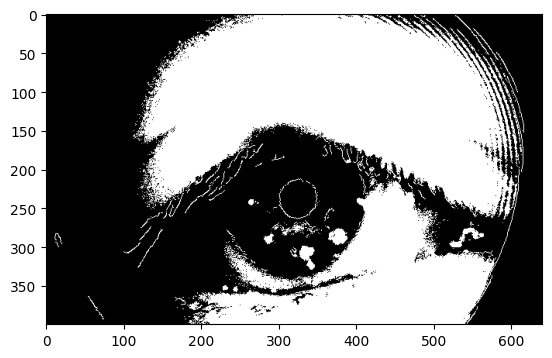

In [17]:
def compute_otsu_criteria(im, th):
    """Otsu's method to compute criteria."""
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0

    return weight0 * var0 + weight1 * var1

im = cv2.imread('/mnt/sdb/data/Openedsdata2020/openEDS2020-GazePrediction/train/sequences/6537/000.png')
# For testing purposes, one can use for example im = np.random.randint(0,255, size = (50,50))

# testing all thresholds from 0 to the maximum of the image
threshold_range = range(np.max(im)+1)
criterias = [compute_otsu_criteria(im, th) for th in threshold_range]

# best threshold is the one minimizing the Otsu criteria
best_threshold = threshold_range[np.argmin(criterias)]

otsu = np.where(im > best_threshold, 255, 0)[:, :, 0]

img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img, (11,11), 0)
edges = cv2.Canny(image=blur, threshold1=15, threshold2=25) # Canny Edge Detection
final_img = edges + otsu
final_img = np.where(final_img >= 255, 255, 0)

plt.imshow(final_img, cmap = 'gray')

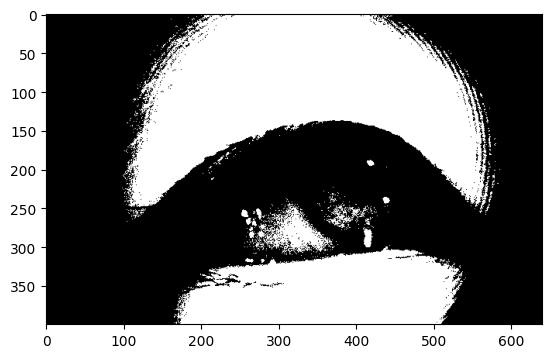

In [16]:
plt.imshow(np.where(im > best_threshold, 255, 0), cmap = 'gray')

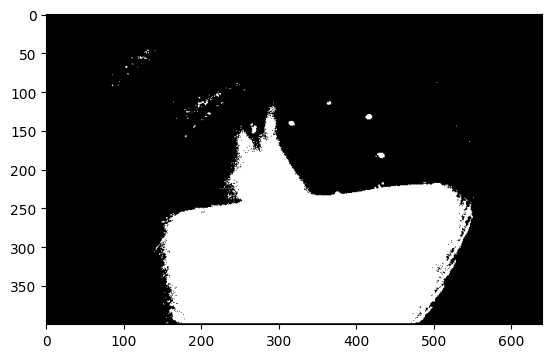

In [8]:
img = cv2.imread('/mnt/sdb/data/Openedsdata2020/openEDS2020-GazePrediction/train/sequences/6426/000.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
ret, thresh1 = cv2.threshold(img, 10, 50, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU) 

plt.figure()
plt.imshow(remap_image(thresh1), cmap='gray')